In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('dataset_final_bp.csv', names=['i_id', 'i_weight', 'i_fat_content', 'i_visibility', 'i_type','i_mrp', 'o_id', 'o_establishment_year', 'o_size', 'o_loc_type', 'o_type', 'i_o_sales'])
test_df = pd.read_csv('test_final_bp.csv', names=['i_id', 'i_weight', 'i_fat_content', 'i_visibility', 'i_type','i_mrp', 'o_id', 'o_establishment_year', 'o_size', 'o_loc_type', 'o_type', 'i_o_sales'])

In [4]:
df['o_id'].value_counts()

OUT027    935
OUT013    931
OUT045    929
OUT017    926
OUT049    926
OUT018    925
OUT046    923
OUT035    922
OUT010    555
OUT019    528
Name: o_id, dtype: int64

In [5]:
df['i_id'].value_counts()

FDW13    10
FDP25     9
FDW49     9
FDQ40     9
FDU12     9
FDX31     9
FDW26     9
DRN47     9
FDX04     9
FDV38     9
NCB18     9
NCQ06     9
NCY18     9
FDD38     9
FDF56     9
DRE49     9
FDG33     9
NCJ30     9
FDG09     9
FDF52     9
FDO19     9
FDV60     9
NCL31     9
NCI54     9
FDT07     9
NCF42     9
FDL34     8
FDT21     8
NCK53     8
DRA59     8
         ..
FDG28     2
FDW58     2
FDZ50     2
NCW05     2
FDO51     2
DRI59     2
NCS41     2
FDW10     2
FDT33     2
DRE01     2
FDF38     2
FDA48     2
NCG19     2
NCV18     2
DRC24     2
NCC55     2
FDU43     2
FDB10     2
FDB47     2
FDU09     2
FDD22     2
DRF48     1
FDQ60     1
FDO33     1
FDC23     1
FDE52     1
FDK57     1
FDT35     1
FDN52     1
FDY43     1
Name: i_id, Length: 1559, dtype: int64

In [6]:
df[df['i_id'] == 'FDX04']

,i_id,i_weight,i_fat_content,i_visibility,i_type,i_mrp,o_id,o_establishment_year,o_size,o_loc_type,o_type,i_o_sales
3380,FDX04,19.6,Regular,0.041807,Frozen Foods,48.8376,OUT017,2007,NaN,Tier 2,Supermarket Type1,527.3136
3443,FDX04,19.6,Regular,0.041636,Frozen Foods,47.3376,OUT049,1999,Medium,Tier 1,Supermarket Type1,1150.5024
3591,FDX04,19.6,Regular,0.041537,Frozen Foods,46.0376,OUT013,1987,High,Tier 3,Supermarket Type1,527.3136
3899,FDX04,19.6,Regular,0.041741,Frozen Foods,49.2376,OUT018,2009,Medium,Tier 3,Supermarket Type2,958.7520
4588,FDX04,NaN,Regular,0.072786,Frozen Foods,49.4376,OUT019,1985,Small,Tier 1,Grocery Store,191.7504
5777,FDX04,19.6,Regular,0.041656,Frozen Foods,48.5376,OUT045,2002,NaN,Tier 2,Supermarket Type1,335.5632
6324,FDX04,19.6,Regular,0.041572,Frozen Foods,49.9376,OUT046,1997,Small,Tier 1,Supermarket Type1,623.1888
6984,FDX04,NaN,Regular,0.041370,Frozen Foods,46.2376,OUT027,1985,Medium,Tier 3,Supermarket Type3,814.9392
7798,FDX04,19.6,Regular,0.041564,Frozen Foods,47.6376,OUT035,2004,Small,Tier 2,Supermarket Type1,335.5632


In [7]:
df[df['o_id'] == 'OUT018'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 1 to 8498
Data columns (total 12 columns):
i_id                    925 non-null object
i_weight                925 non-null float64
i_fat_content           925 non-null object
i_visibility            925 non-null float64
i_type                  925 non-null object
i_mrp                   925 non-null float64
o_id                    925 non-null object
o_establishment_year    925 non-null int64
o_size                  925 non-null object
o_loc_type              925 non-null object
o_type                  925 non-null object
i_o_sales               925 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 93.9+ KB


In [8]:
for x in df.columns.tolist():
    if x[0] == 'o':
        print(df[x].value_counts())

OUT027    935
OUT013    931
OUT045    929
OUT017    926
OUT049    926
OUT018    925
OUT046    923
OUT035    922
OUT010    555
OUT019    528
Name: o_id, dtype: int64
1985    1463
1987     931
2002     929
2007     926
1999     926
2009     925
1997     923
2004     922
1998     555
Name: o_establishment_year, dtype: int64
Medium    2786
Small     2373
High       931
Name: o_size, dtype: int64
Tier 3    3346
Tier 2    2777
Tier 1    2377
Name: o_loc_type, dtype: int64
Supermarket Type1    5557
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     925
Name: o_type, dtype: int64


In [9]:
for x in df.columns.tolist():
    if x[0] == 'i' and x != "i_id":
        print(df[x].value_counts())

12.150    86
17.600    82
13.650    77
11.800    75
15.100    68
9.300     68
16.700    66
10.500    66
19.350    62
16.000    62
20.700    61
9.800     61
17.700    60
17.750    60
18.850    59
15.850    59
15.000    59
16.750    58
19.600    58
18.250    58
15.700    57
12.500    56
9.195     56
20.200    53
10.195    53
12.100    53
12.600    53
15.600    52
11.500    51
13.500    51
          ..
7.105      3
5.845      3
7.260      3
5.305      3
8.000      3
5.825      3
6.905      3
6.895      2
6.325      2
8.920      2
4.905      2
8.800      2
5.735      2
5.210      2
7.560      2
5.885      2
6.775      2
6.405      2
7.275      2
7.605      2
6.400      2
8.670      2
8.485      2
7.890      2
5.155      2
5.675      2
6.520      1
5.400      1
9.420      1
7.685      1
Name: i_weight, Length: 415, dtype: int64
Low Fat    5083
Regular    2881
LF          312
reg         113
low fat     111
Name: i_fat_content, dtype: int64
0.000000    526
0.076975      3
0.072253      2
0.0

In [10]:
df['i_fat_content'].value_counts()

Low Fat    5083
Regular    2881
LF          312
reg         113
low fat     111
Name: i_fat_content, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 12 columns):
i_id                    8500 non-null object
i_weight                7037 non-null float64
i_fat_content           8500 non-null object
i_visibility            8500 non-null float64
i_type                  8500 non-null object
i_mrp                   8500 non-null float64
o_id                    8500 non-null object
o_establishment_year    8500 non-null int64
o_size                  6090 non-null object
o_loc_type              8500 non-null object
o_type                  8500 non-null object
i_o_sales               8500 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 797.0+ KB


In [12]:
df.isnull().sum()

i_id                       0
i_weight                1463
i_fat_content              0
i_visibility               0
i_type                     0
i_mrp                      0
o_id                       0
o_establishment_year       0
o_size                  2410
o_loc_type                 0
o_type                     0
i_o_sales                  0
dtype: int64

In [13]:
df['i_weight'] = df.groupby('i_id').transform(lambda x: x.fillna(x.mean()))

In [14]:
df['o_size'] = df['o_size'].fillna(-1)

In [15]:
df['o_size'].replace('Small', 0, inplace=True)
df['o_size'].replace('Medium', 1, inplace=True)
df['o_size'].replace('High', 2, inplace=True)

In [16]:
df['o_size'] += 1

In [17]:
df['o_size'].value_counts()

2    2786
0    2410
1    2373
3     931
Name: o_size, dtype: int64

In [18]:
df['o_size'].replace('Small', 0, inplace=True)
df['o_size'].replace('Medium', 1, inplace=True)
df['o_size'].replace('High', 2, inplace=True)

In [19]:
df['o_size'].isnull().sum()

0

In [20]:
df['o_size'].isnull().sum()

0

In [21]:
ls

Problem 2 solution.ipynb  dataset_final_bp.csv  final.csv  submission.csv.ods
a.csv                     dk.csv                p2.h5      test_final_bp.csv


In [22]:

df['i_id'].value_counts()

FDW13    10
FDP25     9
FDW49     9
FDQ40     9
FDU12     9
FDX31     9
FDW26     9
DRN47     9
FDX04     9
FDV38     9
NCB18     9
NCQ06     9
NCY18     9
FDD38     9
FDF56     9
DRE49     9
FDG33     9
NCJ30     9
FDG09     9
FDF52     9
FDO19     9
FDV60     9
NCL31     9
NCI54     9
FDT07     9
NCF42     9
FDL34     8
FDT21     8
NCK53     8
DRA59     8
         ..
FDG28     2
FDW58     2
FDZ50     2
NCW05     2
FDO51     2
DRI59     2
NCS41     2
FDW10     2
FDT33     2
DRE01     2
FDF38     2
FDA48     2
NCG19     2
NCV18     2
DRC24     2
NCC55     2
FDU43     2
FDB10     2
FDB47     2
FDU09     2
FDD22     2
DRF48     1
FDQ60     1
FDO33     1
FDC23     1
FDE52     1
FDK57     1
FDT35     1
FDN52     1
FDY43     1
Name: i_id, Length: 1559, dtype: int64

In [23]:
df = df.append(test_df)

In [24]:

df['i_weight'] = df.groupby('i_id').transform(lambda x: x.fillna(x.mean()))

In [25]:
df.isnull().sum()

i_id                     0
i_weight                 4
i_fat_content            0
i_visibility             0
i_type                   0
i_mrp                    0
o_id                     0
o_establishment_year     0
o_size                   0
o_loc_type               0
o_type                   0
i_o_sales               23
dtype: int64

In [26]:
married_lb = LabelEncoder()
df['e_o_type'] = married_lb.fit_transform(df['o_type'])

In [27]:
ls

Problem 2 solution.ipynb  dataset_final_bp.csv  final.csv  submission.csv.ods
a.csv                     dk.csv                p2.h5      test_final_bp.csv


In [28]:
df.o_size.value_counts()

2         2786
0         2410
1         2373
3          931
Small       15
Medium       7
High         1
Name: o_size, dtype: int64

In [29]:
df['o_size'].replace('Small', 1, inplace=True)
df['o_size'].replace('Medium', 2, inplace=True)
df['o_size'].replace('High', 3, inplace=True)

In [30]:
married_lb = LabelEncoder()
df['e_o_loc_type'] = married_lb.fit_transform(df['o_loc_type'])

In [31]:
df['i_fat_content'] = df['i_fat_content'].replace('LF', "Low Fat")

In [32]:
df['i_fat_content'] = df['i_fat_content'].replace('low fat', "Low Fat")
df['i_fat_content'] = df['i_fat_content'].replace('reg', "Regular")

In [33]:
df['i_fat_content'].value_counts()

Low Fat    5517
Regular    3006
Name: i_fat_content, dtype: int64

In [34]:
married_lb = LabelEncoder()
df['e_i_fat_content'] = married_lb.fit_transform(df['i_fat_content'])

In [35]:
married_lb = LabelEncoder()
df['e_i_type'] = married_lb.fit_transform(df['i_type'])

In [36]:
df.columns

Index(['i_id', 'i_weight', 'i_fat_content', 'i_visibility', 'i_type', 'i_mrp',
       'o_id', 'o_establishment_year', 'o_size', 'o_loc_type', 'o_type',
       'i_o_sales', 'e_o_type', 'e_o_loc_type', 'e_i_fat_content', 'e_i_type'],
      dtype='object')

In [37]:
#test_df = pd.read_csv('test_final_lp.csv', names=['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status'])
df['i_weight'].fillna(0, inplace=True)
#df['loan_amount'] = df['loan_amount'].astype(int)
df.head()

,i_id,i_weight,i_fat_content,i_visibility,i_type,i_mrp,o_id,o_establishment_year,o_size,o_loc_type,o_type,i_o_sales,e_o_type,e_o_loc_type,e_i_fat_content,e_i_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380,1,0,0,4
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228,2,2,1,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700,1,0,0,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,0,2,1,6
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052,1,2,0,9


In [38]:
df.o_type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: o_type, dtype: int64

In [39]:

from sklearn import preprocessing 

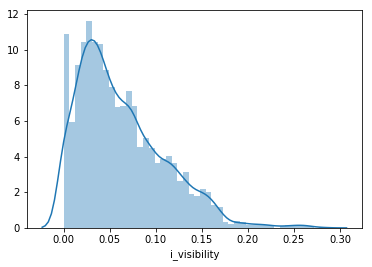

In [40]:
sns.distplot(np.log1p(df['i_visibility']))

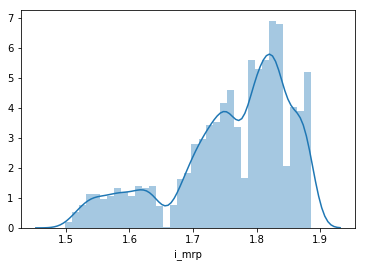

In [41]:
sns.distplot(np.log1p(np.log1p(df['i_mrp'])))

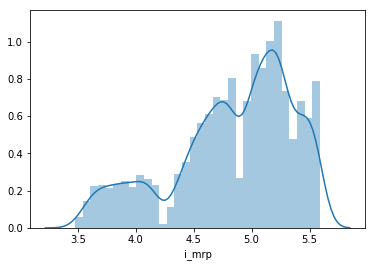

In [42]:
sns.distplot(np.log1p(df['i_mrp']))

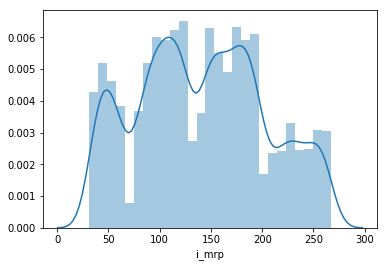

In [43]:
sns.distplot(df['i_mrp'])

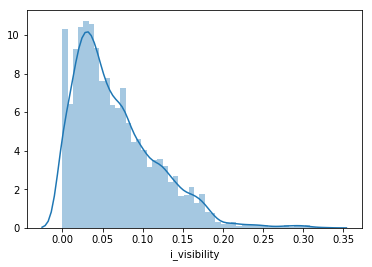

In [44]:
sns.distplot(df.i_visibility)

In [45]:
df['i_mrp'] = np.log1p(np.log1p(df.i_mrp))

In [46]:
df['i_weight'] = np.log1p(df['i_weight'])

In [47]:
df.o_establishment_year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: o_establishment_year, dtype: int64

In [48]:
married_lb = LabelEncoder()
df['e_o_establishment_year'] = married_lb.fit_transform(df['o_establishment_year'])

In [49]:
df['e_o_establishment_year'].value_counts()

0    1463
1     932
6     930
4     930
2     930
5     929
8     928
7     926
3     555
Name: e_o_establishment_year, dtype: int64

In [50]:
df.isnull().sum()

i_id                       0
i_weight                   0
i_fat_content              0
i_visibility               0
i_type                     0
i_mrp                      0
o_id                       0
o_establishment_year       0
o_size                     0
o_loc_type                 0
o_type                     0
i_o_sales                 23
e_o_type                   0
e_o_loc_type               0
e_i_fat_content            0
e_i_type                   0
e_o_establishment_year     0
dtype: int64

In [51]:
import xgboost

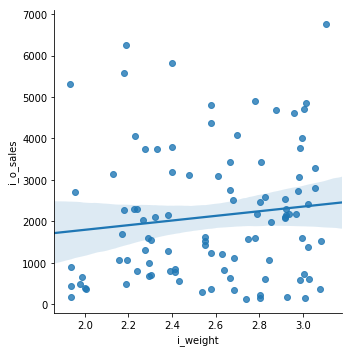

In [52]:
sns.lmplot(data = df[:100], x = 'i_weight', y = "i_o_sales")

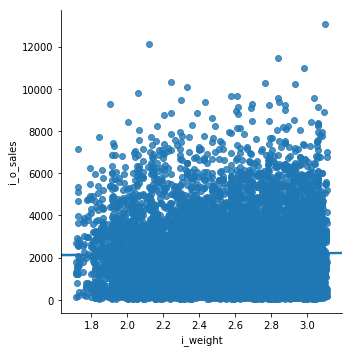

In [53]:
sns.lmplot(data = df[df["i_weight"] > 0.2], x = 'i_weight', y = "i_o_sales")

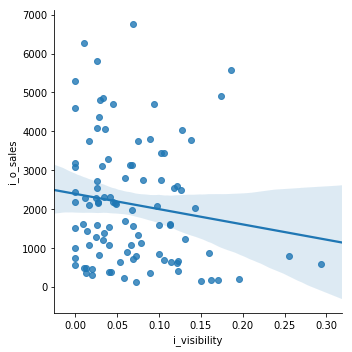

In [54]:
sns.lmplot(data = df[:100], x = 'i_visibility', y = "i_o_sales")

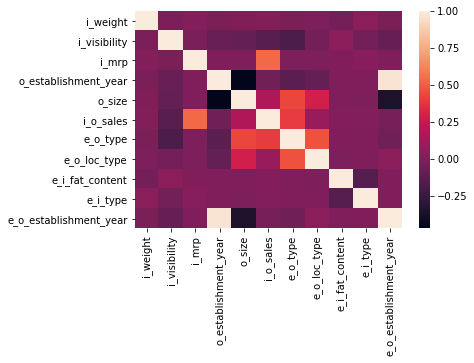

In [55]:
sns.heatmap(df.corr())

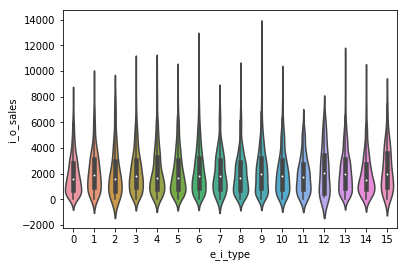

In [56]:
sns.violinplot(data = df, x = 'e_i_type', y = "i_o_sales")

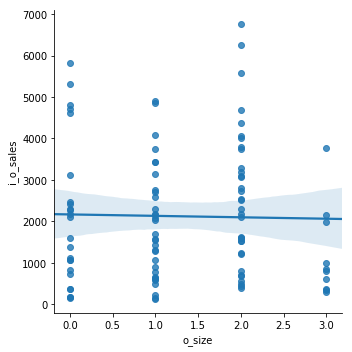

In [57]:
sns.lmplot(data = df[:100], x = 'o_size', y = "i_o_sales")

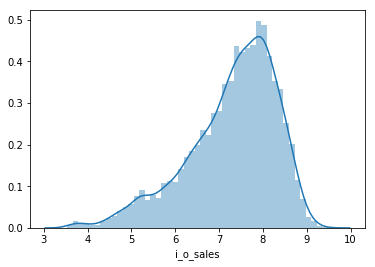

In [58]:
sns.distplot(np.log1p(df.i_o_sales[:8500]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

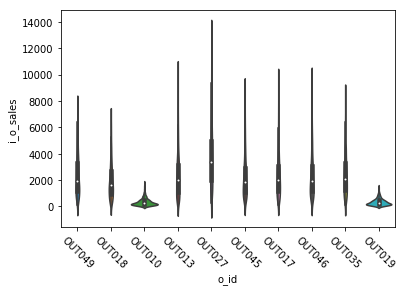

In [59]:
sns.violinplot(data = df, x = 'o_id', y = "i_o_sales")
plt.xticks(rotation=-45)

In [60]:
df.columns

Index(['i_id', 'i_weight', 'i_fat_content', 'i_visibility', 'i_type', 'i_mrp',
       'o_id', 'o_establishment_year', 'o_size', 'o_loc_type', 'o_type',
       'i_o_sales', 'e_o_type', 'e_o_loc_type', 'e_i_fat_content', 'e_i_type',
       'e_o_establishment_year'],
      dtype='object')

In [61]:
fdf = df.drop(columns=['i_id', 'o_id', "o_establishment_year", "o_loc_type", "o_type", "i_fat_content", "i_type"])

In [62]:
fdf.columns

Index(['i_weight', 'i_visibility', 'i_mrp', 'o_size', 'i_o_sales', 'e_o_type',
       'e_o_loc_type', 'e_i_fat_content', 'e_i_type',
       'e_o_establishment_year'],
      dtype='object')

In [63]:
fdf.describe()

,i_weight,i_visibility,i_mrp,o_size,i_o_sales,e_o_type,e_o_loc_type,e_i_fat_content,e_i_type,e_o_establishment_year
count,8523.000000,8523.000000,8523.000000,8523.000000,8500.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2.567396,0.066132,1.760101,1.263640,2180.817169,1.201220,1.112871,0.352693,7.226681,3.790684
std,0.364582,0.051598,0.092884,0.989181,1706.669652,0.796459,0.812757,0.477836,4.209990,2.730322
min,0.000000,0.000000,1.498452,0.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.280851,0.026989,1.714167,0.000000,833.415150,1.000000,0.000000,0.000000,4.000000,1.000000
50%,2.610070,0.053931,1.786731,1.000000,1794.331000,1.000000,1.000000,0.000000,6.000000,4.000000
75%,2.882004,0.094585,1.829248,2.000000,3101.296400,1.000000,2.000000,1.000000,10.000000,6.000000
max,3.106826,0.328391,1.885640,3.000000,13086.964800,3.000000,2.000000,1.000000,15.000000,8.000000


In [64]:
fdf.head()

,i_weight,i_visibility,i_mrp,o_size,i_o_sales,e_o_type,e_o_loc_type,e_i_fat_content,e_i_type,e_o_establishment_year
0,2.332144,0.016047,1.875594,2,3735.1380,1,0,0,4,4
1,1.934416,0.019278,1.588684,2,443.4228,2,2,1,14,8
2,2.917771,0.016760,1.785099,2,2097.2700,1,0,0,10,4
3,3.005683,0.000000,1.826162,0,732.3800,0,2,1,6,3
4,2.295560,0.000000,1.610399,3,994.7052,1,2,0,9,1


In [65]:
import xgboost
model = xgboost.XGBRegressor(max_depth=3, n_estimators=100, missing =0, colsample_bytree=0.8,
                             subsample=1, min_child_weight=10, gamma=0.5)



In [66]:
train = fdf[:8500]
test = fdf[8500:]
test.drop(columns="i_o_sales")
train_y = train['i_o_sales']
train_x = train.drop(columns="i_o_sales")
x_train, x_eval, y_train, y_eval = train_test_split(train_x, train_y, test_size=0.1, random_state=42, shuffle=True)

In [67]:
x_train.columns

Index(['i_weight', 'i_visibility', 'i_mrp', 'o_size', 'e_o_type',
       'e_o_loc_type', 'e_i_fat_content', 'e_i_type',
       'e_o_establishment_year'],
      dtype='object')

In [68]:
x_eval.shape

(850, 9)

In [69]:
    model.fit(x_train, (y_train), eval_set=[(x_eval, (y_eval))], verbose=True)

[0]	validation_0-rmse:2536.81
[1]	validation_0-rmse:2336.33
[2]	validation_0-rmse:2156.62
[3]	validation_0-rmse:2001.25
[4]	validation_0-rmse:1865.06
[5]	validation_0-rmse:1746.29
[6]	validation_0-rmse:1656.28
[7]	validation_0-rmse:1566.61
[8]	validation_0-rmse:1499.67
[9]	validation_0-rmse:1429.32
[10]	validation_0-rmse:1370.21
[11]	validation_0-rmse:1319.76
[12]	validation_0-rmse:1283.44
[13]	validation_0-rmse:1243.59
[14]	validation_0-rmse:1213.9
[15]	validation_0-rmse:1191.34
[16]	validation_0-rmse:1167.16
[17]	validation_0-rmse:1149.3
[18]	validation_0-rmse:1128.68
[19]	validation_0-rmse:1112.57
[20]	validation_0-rmse:1099.67
[21]	validation_0-rmse:1088.36
[22]	validation_0-rmse:1081.12
[23]	validation_0-rmse:1072.38
[24]	validation_0-rmse:1067.26
[25]	validation_0-rmse:1062.19
[26]	validation_0-rmse:1058.07
[27]	validation_0-rmse:1054.51
[28]	validation_0-rmse:1051.76
[29]	validation_0-rmse:1048.03
[30]	validation_0-rmse:1044.39
[31]	validation_0-rmse:1042.52
[32]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=0,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [70]:
    model.fit(x_train, (y_train), eval_set=[(x_train, (y_train))], verbose=True)

[0]	validation_0-rmse:2560.75
[1]	validation_0-rmse:2360.56
[2]	validation_0-rmse:2184.99
[3]	validation_0-rmse:2029.87
[4]	validation_0-rmse:1894.88
[5]	validation_0-rmse:1776.87
[6]	validation_0-rmse:1688.35
[7]	validation_0-rmse:1596.4
[8]	validation_0-rmse:1531.1
[9]	validation_0-rmse:1461.04
[10]	validation_0-rmse:1400.79
[11]	validation_0-rmse:1349.81
[12]	validation_0-rmse:1314.92
[13]	validation_0-rmse:1276.43
[14]	validation_0-rmse:1246.51
[15]	validation_0-rmse:1225.09
[16]	validation_0-rmse:1200.51
[17]	validation_0-rmse:1182.23
[18]	validation_0-rmse:1164.22
[19]	validation_0-rmse:1149.08
[20]	validation_0-rmse:1136.65
[21]	validation_0-rmse:1126.24
[22]	validation_0-rmse:1118.65
[23]	validation_0-rmse:1110.89
[24]	validation_0-rmse:1106
[25]	validation_0-rmse:1100.7
[26]	validation_0-rmse:1096.64
[27]	validation_0-rmse:1092.83
[28]	validation_0-rmse:1089.77
[29]	validation_0-rmse:1085.72
[30]	validation_0-rmse:1082.8
[31]	validation_0-rmse:1080.54
[32]	validation_0-rmse:10

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=0,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [71]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.4, 0.6, 0.8, 1.0],
        'colsample_bytr   ee': [0.4,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        }

In [72]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

grid_search = GridSearchCV(model, n_jobs=4, cv=skf.split(train_x,train_y.astype(int)), verbose=3, param_grid=params )

# Here we go # timing starts from this point for "start_time" variable
grid_search.fit(train_x, train_y.astype(int))


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] gamma=0.5, min_child_weight=1, max_depth=3, colsample_bytr   ee=0.4, subsample=0.4 
[CV] gamma=0.5, min_child_weight=1, max_depth=3, colsample_bytr   ee=0.4, subsample=0.4 
[CV] gamma=0.5, min_child_weight=1, max_depth=3, colsample_bytr   ee=0.4, subsample=0.4 
[CV] gamma=0.5, min_child_weight=1, max_depth=3, colsample_bytr   ee=0.4, subsample=0.4 
[CV] gamma=0.5, min_child_weight=1, max_depth=3, colsample_bytr   ee=0.4, subsample=0.4 


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    179         sys.exit(msg)
    180     main_globals = sys.modules["__main__"].__dict__
    181     if alter_argv:
    182         sys.argv[0] = mod_spec.origin
    183     return _run_code(code, main_globals, None,
--> 184                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py')
    185 
    186 def run_module(mod_name, init_globals=None,
    187                run_name=None, alter_sys=False):
    188     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7f4eceed60c0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/sumedh/.local/lib/python3.5/site-packages/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/sumedh/.local/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/sumedh.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f4eceed60c0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/sumedh/.local/lib/python3.5/site-packages/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/sumedh/.local/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/sumedh.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
/usr/lib/python3.5/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    340             raise RuntimeError('Event loop is running.')
    341         self._set_coroutine_wrapper(self._debug)
    342         self._thread_id = threading.get_ident()
    343         try:
    344             while True:
--> 345                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    346                 if self._stopping:
    347                     break
    348         finally:
    349             self._stopping = False

...........................................................................
/usr/lib/python3.5/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1307                         logger.warning('Executing %s took %.3f seconds',
   1308                                        _format_handle(handle), dt)
   1309                 finally:
   1310                     self._current_handle = None
   1311             else:
-> 1312                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...7f4e863b16a8>))>>
   1313         handle = None  # Needed to break cycles when an exception occurs.
   1314 
   1315     def _set_coroutine_wrapper(self, enabled):
   1316         try:

...........................................................................
/usr/lib/python3.5/asyncio/events.py in _run(self=<Handle IOLoop._run_callback(functools.par...7f4e863b16a8>))>)
    120             self._callback = None
    121             self._args = None
    122 
    123     def _run(self):
    124         try:
--> 125             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x7f4e863b16a8>),)
    126         except Exception as exc:
    127             cb = _format_callback_source(self._callback, self._args)
    128             msg = 'Exception in callback {}'.format(cb)
    129             context = {

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/tornado/ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x7f4e863b16a8>))
    753         """Runs a callback with error handling.
    754 
    755         For use in subclasses.
    756         """
    757         try:
--> 758             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x7f4e863b16a8>)
    759             if ret is not None:
    760                 from tornado import gen
    761                 # Functions that return Futures typically swallow all
    762                 # exceptions and store them in the Future.  If a Future

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 28, 11, 6, 21, 742480, tzinfo=tzutc()), 'msg_id': '0465aa2644804347a96c85c2f451528e', 'msg_type': 'execute_request', 'session': '7c5700c69f8643198885b8c387734fe9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0465aa2644804347a96c85c2f451528e', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'7c5700c69f8643198885b8c387734fe9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 28, 11, 6, 21, 742480, tzinfo=tzutc()), 'msg_id': '0465aa2644804347a96c85c2f451528e', 'msg_type': 'execute_request', 'session': '7c5700c69f8643198885b8c387734fe9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0465aa2644804347a96c85c2f451528e', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'7c5700c69f8643198885b8c387734fe9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 28, 11, 6, 21, 742480, tzinfo=tzutc()), 'msg_id': '0465aa2644804347a96c85c2f451528e', 'msg_type': 'execute_request', 'session': '7c5700c69f8643198885b8c387734fe9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0465aa2644804347a96c85c2f451528e', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import RandomizedSe...le\ngrid_search.fit(train_x, train_y.astype(int))\n', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-72-3a9b3f04f686>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f4e808077b8, executi...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f4e80d625d0, file "<ipython-input-72-3a9b3f04f686>", line 12>
        result = <ExecutionResult object at 7f4e808077b8, executi...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
/home/sumedh/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f4e80d625d0, file "<ipython-input-72-3a9b3f04f686>", line 12>, result=<ExecutionResult object at 7f4e808077b8, executi...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f4e80d625d0, file "<ipython-input-72-3a9b3f04f686>", line 12>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'from matplotlib import pyplot as plt\nget_ipython...m sklearn.model_selection import train_test_split', 'from sklearn.preprocessing import LabelEncoder', "df = pd.read_csv('dataset_final_bp.csv', names=[..., 'o_size', 'o_loc_type', 'o_type', 'i_o_sales'])", "df['o_id'].value_counts()", "df['i_id'].value_counts()", "df[df['i_id'] == 'FDX04']", "df[df['o_id'] == 'OUT018'].info()", "for x in df.columns.tolist():\n    if x[0] == 'o':\n        print(df[x].value_counts())", 'for x in df.columns.tolist():\n    if x[0] == \'i\'... x != "i_id":\n        print(df[x].value_counts())', "df['i_fat_content'].value_counts()", 'df.info()', 'df.isnull().sum()', "df['i_weight'] = df.groupby('i_id').transform(lambda x: x.fillna(x.mean()))", "df['o_size'] = df['o_size'].fillna(-1)", "df['o_size'].replace('Small', 0, inplace=True)\nd...ue)\ndf['o_size'].replace('High', 2, inplace=True)", "df['o_size'] += 1", "df['o_size'].value_counts()", "df['o_size'].replace('Small', 0, inplace=True)\nd...ue)\ndf['o_size'].replace('High', 2, inplace=True)", "df['o_size'].isnull().sum()", ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Out': {4: OUT027    935
OUT013    931
OUT045    929
OUT017...010    555
OUT019    528
Name: o_id, dtype: int64, 5: FDW13    10
FDP25     9
FDW49     9
FDQ40     9
...DY43     1
Name: i_id, Length: 1559, dtype: int64, 6:        i_id  i_weight i_fat_content  i_visibilit...   623.1888  
6984   814.9392  
7798   335.5632  , 10: Low Fat    5083
Regular    2881
LF          312
...low fat     111
Name: i_fat_content, dtype: int64, 12: i_id                       0
i_weight           ...      0
i_o_sales                  0
dtype: int64, 17: 2    2786
0    2410
1    2373
3     931
Name: o_size, dtype: int64, 19: 0, 20: 0, 22: FDW13    10
FDP25     9
FDW49     9
FDQ40     9
...DY43     1
Name: i_id, Length: 1559, dtype: int64, 25: i_id                     0
i_weight             ...        0
i_o_sales               23
dtype: int64, ...}, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, '_': XGBRegressor(base_score=0.5, booster='gbtree', c...ht=1,
       seed=None, silent=True, subsample=1), '_10': Low Fat    5083
Regular    2881
LF          312
...low fat     111
Name: i_fat_content, dtype: int64, '_12': i_id                       0
i_weight           ...      0
i_o_sales                  0
dtype: int64, '_17': 2    2786
0    2410
1    2373
3     931
Name: o_size, dtype: int64, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'from matplotlib import pyplot as plt\nget_ipython...m sklearn.model_selection import train_test_split', 'from sklearn.preprocessing import LabelEncoder', "df = pd.read_csv('dataset_final_bp.csv', names=[..., 'o_size', 'o_loc_type', 'o_type', 'i_o_sales'])", "df['o_id'].value_counts()", "df['i_id'].value_counts()", "df[df['i_id'] == 'FDX04']", "df[df['o_id'] == 'OUT018'].info()", "for x in df.columns.tolist():\n    if x[0] == 'o':\n        print(df[x].value_counts())", 'for x in df.columns.tolist():\n    if x[0] == \'i\'... x != "i_id":\n        print(df[x].value_counts())', "df['i_fat_content'].value_counts()", 'df.info()', 'df.isnull().sum()', "df['i_weight'] = df.groupby('i_id').transform(lambda x: x.fillna(x.mean()))", "df['o_size'] = df['o_size'].fillna(-1)", "df['o_size'].replace('Small', 0, inplace=True)\nd...ue)\ndf['o_size'].replace('High', 2, inplace=True)", "df['o_size'] += 1", "df['o_size'].value_counts()", "df['o_size'].replace('Small', 0, inplace=True)\nd...ue)\ndf['o_size'].replace('High', 2, inplace=True)", "df['o_size'].isnull().sum()", ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Out': {4: OUT027    935
OUT013    931
OUT045    929
OUT017...010    555
OUT019    528
Name: o_id, dtype: int64, 5: FDW13    10
FDP25     9
FDW49     9
FDQ40     9
...DY43     1
Name: i_id, Length: 1559, dtype: int64, 6:        i_id  i_weight i_fat_content  i_visibilit...   623.1888  
6984   814.9392  
7798   335.5632  , 10: Low Fat    5083
Regular    2881
LF          312
...low fat     111
Name: i_fat_content, dtype: int64, 12: i_id                       0
i_weight           ...      0
i_o_sales                  0
dtype: int64, 17: 2    2786
0    2410
1    2373
3     931
Name: o_size, dtype: int64, 19: 0, 20: 0, 22: FDW13    10
FDP25     9
FDW49     9
FDQ40     9
...DY43     1
Name: i_id, Length: 1559, dtype: int64, 25: i_id                     0
i_weight             ...        0
i_o_sales               23
dtype: int64, ...}, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, '_': XGBRegressor(base_score=0.5, booster='gbtree', c...ht=1,
       seed=None, silent=True, subsample=1), '_10': Low Fat    5083
Regular    2881
LF          312
...low fat     111
Name: i_fat_content, dtype: int64, '_12': i_id                       0
i_weight           ...      0
i_o_sales                  0
dtype: int64, '_17': 2    2786
0    2410
1    2373
3     931
Name: o_size, dtype: int64, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/home/sumedh/kaggle/MS/problem2/<ipython-input-72-3a9b3f04f686> in <module>()
      7 skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
      8 
      9 grid_search = GridSearchCV(model, n_jobs=4, cv=skf.split(train_x,train_y.astype(int)), verbose=3, param_grid=params )
     10 
     11 # Here we go # timing starts from this point for "start_time" variable
---> 12 grid_search.fit(train_x, train_y.astype(int))

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=<generator object _BaseKFold.spl...ain_score='warn',
       scoring=None, verbose=3), X=      i_weight  i_visibility     i_mrp  o_size  ...                     5  

[8500 rows x 9 columns], y=0       3735
1        443
2       2097
3        ...  549
Name: i_o_sales, Length: 8500, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _CVIterableWrapper.split of _CVIte... 8498]), array([ 149,  217, ..., 8497, 8499]))])>
        X =       i_weight  i_visibility     i_mrp  o_size  ...                     5  

[8500 rows x 9 columns]
        y = 0       3735
1        443
2       2097
3        ...  549
Name: i_o_sales, Length: 8500, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Sep 28 16:36:38 2018
PID: 10892                                   Python 3.5.2: /usr/bin/python3
...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (XGBRegressor(base_score=0.5, booster='gbtree', c...ht=1,
       seed=None, silent=True, subsample=1),       i_weight  i_visibility     i_mrp  o_size  ...                     5  

[8500 rows x 9 columns], 0       3735
1        443
2       2097
3        ...  549
Name: i_o_sales, Length: 8500, dtype: int64, {'score': <function _passthrough_scorer>}, array([   0,    1,    2, ..., 8496, 8497, 8499]), array([   3,   10,   14, ..., 8488, 8492, 8498]), 3, {'colsample_bytr   ee': 0.4, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.4}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (XGBRegressor(base_score=0.5, booster='gbtree', c...ht=1,
       seed=None, silent=True, subsample=1),       i_weight  i_visibility     i_mrp  o_size  ...                     5  

[8500 rows x 9 columns], 0       3735
1        443
2       2097
3        ...  549
Name: i_o_sales, Length: 8500, dtype: int64, {'score': <function _passthrough_scorer>}, array([   0,    1,    2, ..., 8496, 8497, 8499]), array([   3,   10,   14, ..., 8488, 8492, 8498]), 3, {'colsample_bytr   ee': 0.4, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.4})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=XGBRegressor(base_score=0.5, booster='gbtree', c...ht=1,
       seed=None, silent=True, subsample=1), X=      i_weight  i_visibility     i_mrp  o_size  ...                     5  

[8500 rows x 9 columns], y=0       3735
1        443
2       2097
3        ...  549
Name: i_o_sales, Length: 8500, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([   0,    1,    2, ..., 8496, 8497, 8499]), test=array([   3,   10,   14, ..., 8488, 8492, 8498]), verbose=3, parameters={'colsample_bytr   ee': 0.4, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.4}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of XGBReg...t=1,
       seed=None, silent=True, subsample=1)>
        parameters = {'colsample_bytr   ee': 0.4, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.4}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/base.py in set_params(self=XGBRegressor(base_score=0.5, booster='gbtree', c...ht=1,
       seed=None, silent=True, subsample=1), **params={'colsample_bytr   ee': 0.4, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.4})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'colsample_bytr   ee'
        self = XGBRegressor(base_score=0.5, booster='gbtree', c...ht=1,
       seed=None, silent=True, subsample=1)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter colsample_bytr   ee for estimator XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=0,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [ ]:
grid_search.best_params_

In [ ]:
x_train.columns

In [ ]:

xgboost.plot_importance(model)

In [ ]:
ans= model.predict(test.drop(columns="i_o_sales"))

In [ ]:
prediction = pd.DataFrame(data={'Id':range(1,24), "Expected": ans})

In [ ]:
prediction.to_csv('./a.csv')

In [ ]:
train_x.columns

In [73]:
tr = fdf[:8500]
te = fdf[8500:]
tr = tr.drop(columns=['e_i_fat_content', 'e_o_loc_type'])
tr["i_mrp_pow2"] = tr['i_mrp'] ** 2
te.drop(columns="i_o_sales")
tr_y = tr['i_o_sales'] 
tr['i_vis_weight'] = tr['i_weight'] * tr['i_visibility']
tr_x = tr.drop(columns="i_o_sales")
x_tr, x_ev, y_tr, y_ev = train_test_split(tr_x, tr_y, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
tr.columns

In [74]:
    model.fit(x_tr, (y_tr), eval_set=[(x_ev, (y_ev))], verbose=True)

[0]	validation_0-rmse:2526.22
[1]	validation_0-rmse:2327.28
[2]	validation_0-rmse:2151.76
[3]	validation_0-rmse:2000.69
[4]	validation_0-rmse:1863.52
[5]	validation_0-rmse:1744.42
[6]	validation_0-rmse:1654.16
[7]	validation_0-rmse:1564.86
[8]	validation_0-rmse:1483.39
[9]	validation_0-rmse:1414.21
[10]	validation_0-rmse:1355.14
[11]	validation_0-rmse:1305.44
[12]	validation_0-rmse:1264.81
[13]	validation_0-rmse:1229
[14]	validation_0-rmse:1201.99
[15]	validation_0-rmse:1173.98
[16]	validation_0-rmse:1149.9
[17]	validation_0-rmse:1132.95
[18]	validation_0-rmse:1115.76
[19]	validation_0-rmse:1100.93
[20]	validation_0-rmse:1089.39
[21]	validation_0-rmse:1079.7
[22]	validation_0-rmse:1073.04
[23]	validation_0-rmse:1065
[24]	validation_0-rmse:1059.7
[25]	validation_0-rmse:1055.68
[26]	validation_0-rmse:1050.45
[27]	validation_0-rmse:1047.54
[28]	validation_0-rmse:1045.29
[29]	validation_0-rmse:1042.31
[30]	validation_0-rmse:1039.44
[31]	validation_0-rmse:1037.81
[32]	validation_0-rmse:1035

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=0,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [ ]:
p = model.predict(x_ev)
mean_squared_error(p*x_ev['i_mrp'], y_ev * x_ev['i_mrp'])

In [ ]:
np.sqrt(1057096.8251000412)

In [ ]:
    model.fit(x_tr, (y_tr), eval_set=[(x_tr, (y_tr))], verbose=True)

In [ ]:
#te = te.drop(columns=['e_i_fat_content', 'e_o_loc_type'])
te["i_mrp_pow2"] = te['i_mrp'] * 2
te['i_vis_weight'] = te['i_weight'] * te['i_visibility']

In [ ]:
model.predict(te) 

In [ ]:
pd.DataFrame(data={'Id':range(1,24), "Expected": model.predict(te)}).to_csv('final.csv')

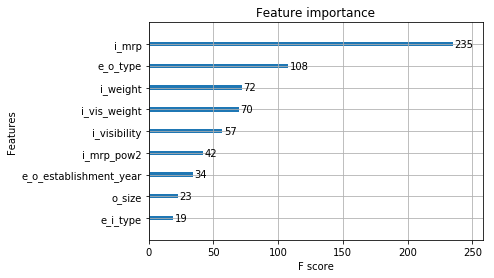

In [75]:
xgboost.plot_importance(model)

In [ ]:
sns.heatmap(x_tr.corr())

In [ ]:
x_tr.e_o_type.value_counts()

In [ ]:
x_tr.shape

In [ ]:
x_tr.o_size.value_counts()

In [ ]:
import numpy as np
import cv2
import math
import copy
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

In [ ]:
model = Sequential()
model.add(Dense(20, activation='relu', activity_regularizer=l2(0.01), input_shape=(26,)))
model.add(Dense(20, activation='relu', activity_regularizer=l2(0.01)))
model.add(Dense(1, activity_regularizer=l2(0.01)))

In [ ]:
bef = pd.concat([pd.get_dummies(fdf['e_i_type'], prefix="e_i_type"), pd.get_dummies(fdf['e_o_type'], prefix="e_o_type")], axis=1)

In [ ]:
bef

In [ ]:
fdf

In [ ]:
new = pd.concat([fdf, pd.DataFrame(bef)], axis=1)
tr = new[:8500]
te = new[8500:]
tr = tr.drop(columns=['e_i_fat_content', 'e_o_loc_type', 'e_o_type', 'e_i_type'])
tr["i_mrp_pow2"] = tr['i_mrp'] * 2
tr.get
te.drop(columns="i_o_sales")
tr_y = tr['i_o_sales']
tr_x = tr.drop(columns="i_o_sales")
x_tr, x_ev, y_tr, y_ev = train_test_split(tr_x, tr_y, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
x_tr.columns

In [ ]:
x_tr.describe()

In [ ]:
    adam = Adam(lr=0.001, decay = 1e-6)
    model.compile(optimizer=adam, loss='mean_squared_error')

In [ ]:
model.summary()

In [ ]:
    checkpoint = ModelCheckpoint("p2.h5", verbose=1,
            save_weights_only=False, mode='min')
    callbacks_list = [checkpoint]
    model.fit(x_tr.values, y_tr.values, batch_size=128, validation_data = (x_ev.values, y_ev.values),
            callbacks=callbacks_list, shuffle=True, epochs=100, verbose=2)


In [ ]:
predict = model.predict(x_tr.values)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(predict, y_tr.values)

In [ ]:
predict

In [ ]:
y_tr.values

model.summary()